# Beyond Linear Classification


In this tutorial, we explore the limitations of linear classifiers, including Support Vector Machines (SVMs) implemented in Keras, and show how neural networks can overcome these limitations. 

We start with the classic XOR dataset as an example of a problem that is not linearly separable.

 
### The XOR Problem

The XOR (exclusive or) dataset is a standard example used to illustrate the limitations of linear classification. The XOR function is defined as:

$$
\text{XOR}(x_1, x_2) =
\begin{cases} 
1, & \text{if } x_1 \neq x_2 \\
0, & \text{if } x_1 = x_2
\end{cases}
$$

When plotted in a 2D space, the points corresponding to the XOR function cannot be separated by a single straight line (or hyperplane). Linear classifiers, including linear SVMs, create decision boundaries that are straight lines. Therefore, they cannot correctly classify the XOR dataset.



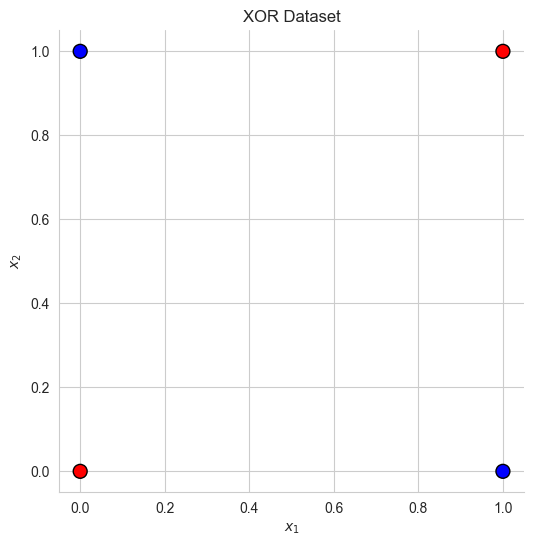

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")
# Define the XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])

# Create colors for the two classes
colors = ['red' if label == 0 else 'blue' for label in y]

# Plot the XOR dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolor='k')
plt.title("XOR Dataset")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
sns.despine()
plt.show()


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# XOR outputs: 0 if inputs are the same, 1 if they are different
y = np.array([0, 1, 1, 0])

# Create a simple neural network with one hidden layer
model = Sequential([
    Input(shape=(2,)),          
    Dense(10, activation='linear'),  
    Dense(1, activation='linear') 
])

model.compile(loss='hinge', optimizer='sgd')

# Train the model
model.fit(X, y, epochs=5000, verbose=0)

# Evaluate the model on the XOR dataset
predictions = model.predict(X)
print("Predictions on the XOR dataset:")
print(predictions)


KeyboardInterrupt: 

## Non-Linearity 
### Activation Functions

An **activation function** is a mathematical function applied to the output of a neuron (or node) in a neural network. Its primary purpose is to introduce non-linearity into the model, which allows the network to learn and represent complex patterns.

### Key Points:

- **Transformation:**  
  After the neuron computes a weighted sum of its inputs, the activation function transforms this sum into the neuron's output. Mathematically, if the weighted sum is given by:
  $$
  z = W \cdot x + b,
  $$
  then the neuron's output is:
  $$
  a = \phi(z),
  $$
  where \(\phi\) is the activation function.

- **Non-Linearity:**  
  Without an activation function, no matter how many layers a network has, the entire model would be equivalent to a single linear transformation. Activation functions like \(\tanh\), \(\sigma\) (sigmoid), and ReLU introduce non-linear behavior, enabling the network to model complex relationships between inputs and outputs.

### Examples
  - **Sigmoid:**  
    $$
    \sigma(z) = \frac{1}{1 + e^{-z}}
    $$
    Outputs values in the range $(0, 1)$, useful for binary classification.
  - **Tanh:**  
    $$
    \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
    $$
    Outputs values in the range $[-1, 1]$, which is zero-centered.
  - **ReLU:**  
    $$
    \text{ReLU}(z) = \max(0, z)
    $$
    Outputs zero for negative inputs and a linear function for positive inputs.


An activation function takes the input to a neuron (typically a weighted sum plus bias) and transforms it into a useful output for the next layer. This transformation is crucial because it allows neural networks to learn non-linear mappings from inputs to outputs, which is essential for solving complex real-world problems.







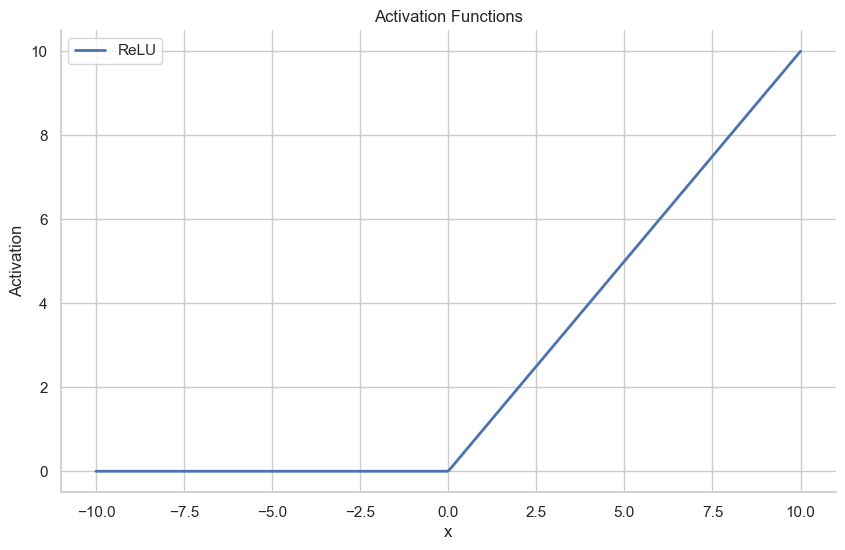

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Generate a range of input values
x = np.linspace(-10, 10, 400)

# Compute activation values for each function
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)

# Create the plot
plt.figure(figsize=(10, 6))
# plt.plot(x, y_sigmoid, label='Sigmoid', linewidth=2)
# plt.plot(x, y_tanh, label='Tanh', linewidth=2)
plt.plot(x, y_relu, label='ReLU', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('Activation')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)
sns.despine()
plt.show()


Try using different activation functions in the code below to see how they affect the decision boundary for the XOR dataset.

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# XOR outputs: 0 if inputs are the same, 1 if they are different
y = np.array([0, 1, 1, 0])

# Create a simple neural network with one hidden layer
model = Sequential([
    Input(shape=(2,)),          
    Dense(1, activation='tanh'),  # sigmoid, tanh, relu
    #Dense(1, activation='linear') 
])

model.compile(loss='hinge', optimizer='sgd')

# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Evaluate the model on the XOR dataset
predictions = model.predict(X)
print("Predictions on the XOR dataset:")
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predictions on the XOR dataset:
[[-0.33600798]
 [ 0.8489278 ]
 [ 0.77502054]
 [ 0.9897587 ]]


## Binary Cross-Entropy

**Binary Cross-Entropy** (also known as log loss) is a loss function commonly used for binary classification tasks. It measures the difference between the true labels and the predicted probabilities (usually produced by a sigmoid activation). The binary cross-entropy loss for a single example is given by:

$$
\ell(y, \hat{y}) = -\left[y \log(\hat{y}) + (1-y) \log(1-\hat{y})\right]
$$

For a dataset of $N$ examples, the average loss is:

$$
L_{\text{binary}} = -\frac{1}{N} \sum_{i=1}^{N} \left[y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)\right]
$$

### Why Use Binary Cross-Entropy?

- **Probabilistic Interpretation:**  
  Binary cross-entropy is ideal when the model outputs a probability between 0 and 1 (using a sigmoid activation in the output layer). It directly penalizes the distance between the predicted probability and the true label.

- **Sensitivity to Confident Errors:**  
  It heavily penalizes cases where the model is confident in its wrong prediction, which encourages the network to improve its probability estimates.

- **Smooth and Differentiable:**  
  The function is smooth and differentiable, which is crucial for gradient-based optimization methods.

### Why Not Use Hinge Loss or MSE?

- **Hinge Loss:**
  - **Designed for Margin-Based Classifiers:**  
    Hinge loss is commonly used in SVMs. It is defined as:
    $$
    \ell_{\text{hinge}}(y, \hat{y}) = \max(0, 1 - y \cdot \hat{y})
    $$
    Hinge loss works well for "maximum-margin" classifiers but is less natural when the model outputs probabilities.
  - **Non-Smooth Points:**  
    Although hinge loss is convex, it is not smooth everywhere, which can sometimes complicate optimization with gradient descent.
  
- **Mean Squared Error (MSE):**
  - **Designed for Regression:**  
    MSE is given by:
    $$
    \ell_{\text{MSE}}(y, \hat{y}) = (y - \hat{y})^2
    $$
    It is more appropriate for regression tasks where the target is a continuous value.
  - **Less Suitable for Classification:**  
    When used for classification, MSE tends to produce slower convergence and poorer probability estimates because it does not penalize misclassifications as effectively as binary cross-entropy.









In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# XOR outputs: 0 if inputs are the same, 1 if they are different
y = np.array([0, 1, 1, 0])

# Create a simple neural network with one hidden layer
model = Sequential([
    Input(shape=(2,)),          
    Dense(10, activation='tanh'),  # sigmoid, tanh, relu
    Dense(1, activation='sigmoid') 
])

model.compile(loss='binary_crossentropy', optimizer='sgd')

# Train the model
model.fit(X, y, epochs=5000, verbose=0)

# Evaluate the model on the XOR dataset
predictions = model.predict(X)
print("Predictions on the XOR dataset:")
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predictions on the XOR dataset:
[[0.17061014]
 [0.6340203 ]
 [0.78563744]
 [0.41862658]]


## Optimizers in Keras

Keras provides several built-in optimizers that adjust the model parameters during training. Here are some of the most commonly used optimizers:

- **SGD (Stochastic Gradient Descent):**  
  A basic optimizer that updates parameters in the direction of the negative gradient. It can be enhanced with momentum and Nesterov accelerated gradients to improve convergence and help escape local minima.

- **RMSprop:**  
  An adaptive learning rate optimizer that scales the learning rate based on a moving average of squared gradients. RMSprop is particularly effective for non-stationary problems and recurrent neural networks.

- **Adam (Adaptive Moment Estimation):**  
  Combines the benefits of RMSprop and momentum. Adam maintains running averages of both the gradients and their squared values, providing adaptive learning rates for each parameter, which often leads to faster convergence.

- **Adagrad:**  
  Adjusts the learning rate for each parameter individually by accumulating the sum of squared gradients. It works well for sparse data but can suffer from an aggressive, monotonically decreasing learning rate.

- **Adadelta:**  
  An extension of Adagrad that limits the accumulation of past squared gradients to a fixed window, mitigating the aggressive decay of the learning rate.

- **Nadam:**  
  A variant of Adam that incorporates Nesterov momentum. It can sometimes improve convergence by anticipating future parameter updates.

- **Ftrl:**  
  An optimizer designed for large-scale machine learning tasks and online learning scenarios, particularly in logistic regression.

Each optimizer has its own strengths and is suited to different problems. Choosing the right one and tuning its hyperparameters can significantly influence the training performance and convergence speed of your neural network.







In [31]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# XOR outputs: 0 if inputs are the same, 1 if they are different
y = np.array([0, 1, 1, 0])

# Create a simple neural network with one hidden layer
model = Sequential([
    Input(shape=(2,)),          
    Dense(10, activation='tanh'),  # sigmoid, tanh, relu
    Dense(1, activation='sigmoid') 
])

model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the model
model.fit(X, y, epochs=5000, verbose=0)

# Evaluate the model on the XOR dataset
predictions = model.predict(X)
print("Predictions on the XOR dataset:")
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predictions on the XOR dataset:
[[0.00388714]
 [0.9963976 ]
 [0.99792665]
 [0.00197501]]
